# CMPE-788: Final Project Part 2


## 1. Data Preprocessing

### 1.1 Overview

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# CICDIDS2018 datasets
# ids_df_1 = pd.read_csv('/content/drive/MyDrive/IDS2018/02-14-2018.csv')
ids_df_2 = pd.read_csv('/content/drive/MyDrive/IDS2018/02-15-2018.csv')
# ids_df_3 = pd.read_csv('/content/drive/MyDrive/IDS2018/02-16-2018.csv') - mix
ids_df_4 = pd.read_csv('/content/drive/MyDrive/IDS2018/02-21-2018.csv')
# ids_df_5 = pd.read_csv('/content/drive/MyDrive/IDS2018/02-22-2018.csv')
# ids_df_6 = pd.read_csv('/content/drive/MyDrive/IDS2018/02-23-2018.csv')
# ids_df_7 = pd.read_csv('/content/drive/MyDrive/IDS2018/02-28-2018.csv') - mix
# ids_df_8 = pd.read_csv('/content/drive/MyDrive/IDS2018/03-01-2018.csv') - mix
ids_df_9 = pd.read_csv('/content/drive/MyDrive/IDS2018/03-02-2018.csv') # Friday




In [ ]:
df = pd.concat([ids_df_2, ids_df_4, ids_df_9])
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0.0,0,0,...,0,0.0,0.000000,0.0,0.0,56320579.0,7.042784e+02,56321077.0,56320081.0,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993.0,712,0,...,32,1024353.0,649038.754495,1601183.0,321569.0,11431221.0,3.644991e+06,15617415.0,8960247.0,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0.0,64,0,...,32,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0.0,0,0,...,0,0.0,0.000000,0.0,0.0,56320351.5,3.669884e+02,56320611.0,56320092.0,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0.0,0,0,...,0,0.0,0.000000,0.0,0.0,56320437.0,7.198347e+02,56320946.0,56319928.0,Benign


In [ ]:
df.shape

(3145725, 80)

In [ ]:
# Turn all column names to lower case
df.columns = df.columns.str.lower()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194300 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Timestamp          object 
 3   Flow Duration      int64  
 4   Tot Fwd Pkts       int64  
 5   Tot Bwd Pkts       int64  
 6   TotLen Fwd Pkts    int64  
 7   TotLen Bwd Pkts    float64
 8   Fwd Pkt Len Max    int64  
 9   Fwd Pkt Len Min    int64  
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    int64  
 13  Bwd Pkt Len Min    int64  
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       float64
 21  Flow IAT Min       float64
 22  Fwd IAT Tot        float64
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max       

In [ ]:
df.isnull().sum()

Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64

In [ ]:
df['label'].unique()

array(['Benign', 'FTP-BruteForce', 'SSH-Bruteforce',
       'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
       'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC', 'Bot'], dtype=object)

#### Removing row with erroneous 'Label' label

In [ ]:
# Remove erroneous 'Label' row
df.drop(df.loc[df["label"] == "Label"].index, inplace=True)

In [ ]:
# Creating "Malicious" label from the "Bot", "DoS attacks-SlowHTTPTest", and "DoS attacks-Hulk" labels
attack_cat = np.copy(df['label'])

df.replace(to_replace=['FTP-BruteForce', 'SSH-Bruteforce',
       'DoS attacks-GoldenEye', 'DoS attacks-Slowloris',
       'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC', 'Brute Force -Web',
       'Brute Force -XSS', 'SQL Injection', 'Bot'], value="Attack", inplace=True)

df['attack_cat'] = attack_cat

#### Replacing Benign labels with zeroes and Malicious labels with ones

In [ ]:
df.replace(to_replace="Benign", value=0, inplace=True)
df.replace(to_replace="Attack", value=1, inplace=True)

In [ ]:
df.columns

Index(['dst port', 'protocol', 'timestamp', 'flow duration', 'tot fwd pkts',
       'tot bwd pkts', 'totlen fwd pkts', 'totlen bwd pkts', 'fwd pkt len max',
       'fwd pkt len min', 'fwd pkt len mean', 'fwd pkt len std',
       'bwd pkt len max', 'bwd pkt len min', 'bwd pkt len mean',
       'bwd pkt len std', 'flow byts/s', 'flow pkts/s', 'flow iat mean',
       'flow iat std', 'flow iat max', 'flow iat min', 'fwd iat tot',
       'fwd iat mean', 'fwd iat std', 'fwd iat max', 'fwd iat min',
       'bwd iat tot', 'bwd iat mean', 'bwd iat std', 'bwd iat max',
       'bwd iat min', 'fwd psh flags', 'bwd psh flags', 'fwd urg flags',
       'bwd urg flags', 'fwd header len', 'bwd header len', 'fwd pkts/s',
       'bwd pkts/s', 'pkt len min', 'pkt len max', 'pkt len mean',
       'pkt len std', 'pkt len var', 'fin flag cnt', 'syn flag cnt',
       'rst flag cnt', 'psh flag cnt', 'ack flag cnt', 'urg flag cnt',
       'cwe flag count', 'ece flag cnt', 'down/up ratio', 'pkt size avg',
      

### 1.2. Network traffic distribution

1026431 of 3145725 network flows are attacks and it is the 32.63% of the data set.
2119294 of 3145725 network flows are normal and it is the 67.37% of the data set.


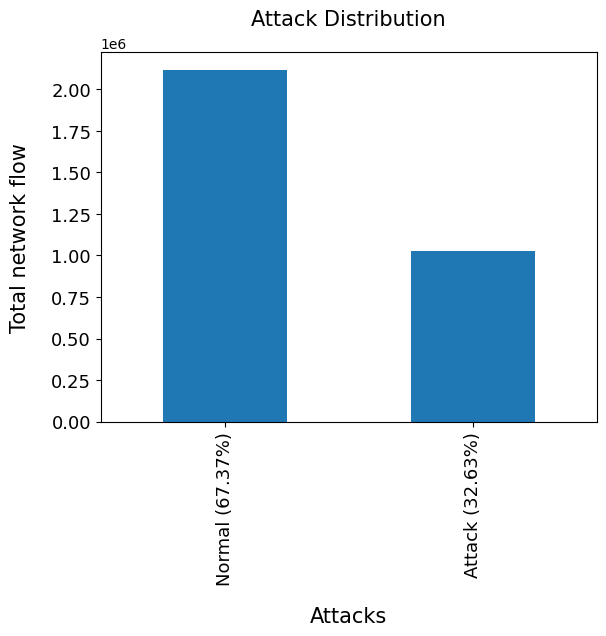

In [ ]:
# attacks vs normal
attack = df['label'].value_counts()[1]
normal = df['label'].value_counts()[0]
attack_per = attack / df.shape[0] * 100
normal_per = normal / df.shape[0] * 100

print('{} of {} network flows are attacks and it is the {:.2f}% of the data set.'.format(attack, df.shape[0], attack_per))
print('{} of {} network flows are normal and it is the {:.2f}% of the data set.'.format(normal, df.shape[0], normal_per))


# count the occurrences of each unique value in the 'name' column
counts = df['label'].value_counts()

# plot the result as a bar plot
counts.plot(kind='bar')

# set x and y labels and a title for the plot
plt.xlabel('Attacks', size=15, labelpad=15)
plt.ylabel('Total network flow', size=15, labelpad=15)
plt.xticks((0, 1), ['Normal ({0:.2f}%)'.format(normal_per), 'Attack ({0:.2f}%)'.format(attack_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Attack Distribution', size=15, y=1.05)

# display the plot
plt.show()


### 1.2. All network categories distribution

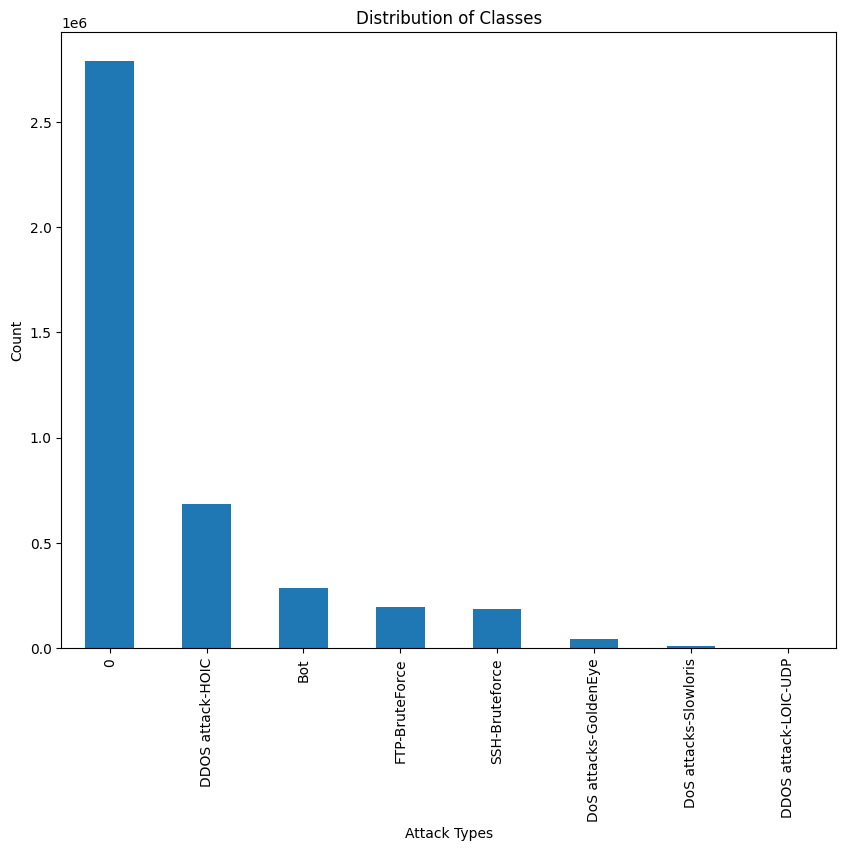

In [ ]:
# all attack categories

attack_categories = df['attack_cat'].value_counts()

# Create a new figure with a custom size
plt.figure(figsize=(10, 8))

attack_categories.plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Attack Types')
plt.ylabel('Count')
plt.show()

### 1.3. Distribution of transaction protocol with respect to each attack category

In [ ]:
# Interactive plot:
import plotly.graph_objects as go


# Group the data by the attack_cat column and srcip column, and count the number of occurrences of each value
grouped_data = df.groupby(['attack_cat', 'protocol']).size().unstack()

# Create a list of traces for the plot
traces = []
for i, col in enumerate(grouped_data.columns):
    trace = go.Bar(x=grouped_data.index, y=grouped_data[col], name=col)
    traces.append(trace)

# Create the layout for the plot
# Create the layout for the plot
layout = go.Layout(
    title='Distribution of IP addresses with respect to each Attack category',
    xaxis=dict(title='Attack categories'),
    yaxis=dict(title='Occurrences'),
    barmode='stack')

# Create the figure object and add the traces and layout
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()


### 1.4. Distribution of transaction protocol with respect to each network type

In [ ]:

# Group the data by the attack_cat column and srcip column, and count the number of occurrences of each value
grouped_data = df.groupby(['label', 'protocol']).size().unstack()

# Create a list of traces for the plot
traces = []
for i, col in enumerate(grouped_data.columns):
    trace = go.Bar(x=grouped_data.index, y=grouped_data[col], name=col)
    traces.append(trace)

# Create the layout for the plot
# Create the layout for the plot
layout = go.Layout(
    title='Distribution of transaction protocol with respect to each network type',
    xaxis=dict(title='Network types'),
    yaxis=dict(title='Occurrences'),
    barmode='stack')

# Create the figure object and add the traces and layout
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()


### One-hot encode transaction protocols - Checking "Protocol" values, and creating dummies based on the assumption that the Protocol values are categorical

In [ ]:
df['protocol'].unique()

array([ 0,  6, 17])

In [ ]:
# Forcing them to be strings
df['protocol'] = df['protocol'].astype(str)
df['protocol'].unique()

array(['0', '6', '17'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['protocol'], drop_first=True)
df

,dst port,timestamp,flow duration,tot fwd pkts,tot bwd pkts,totlen fwd pkts,totlen bwd pkts,fwd pkt len max,fwd pkt len min,fwd pkt len mean,...,active max,active min,idle mean,idle std,idle max,idle min,label,attack_cat,protocol_17,protocol_6
0,0,15/02/2018 08:25:18,112641158,3,0,0,0.0,0,0,0.000000,...,0.0,0.0,56320579.0,7.042784e+02,56321077.0,56320081.0,0,0,0,0
1,22,15/02/2018 08:29:05,37366762,14,12,2168,2993.0,712,0,154.857143,...,1601183.0,321569.0,11431221.0,3.644991e+06,15617415.0,8960247.0,0,0,0,1
2,47514,15/02/2018 08:29:42,543,2,0,64,0.0,64,0,32.000000,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,1
3,0,15/02/2018 08:28:07,112640703,3,0,0,0.0,0,0,0.000000,...,0.0,0.0,56320351.5,3.669884e+02,56320611.0,56320092.0,0,0,0,0
4,0,15/02/2018 08:30:56,112640874,3,0,0,0.0,0,0,0.000000,...,0.0,0.0,56320437.0,7.198347e+02,56320946.0,56319928.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3389,02/03/2018 02:08:18,3982183,14,8,1442,1731.0,725,0,103.000000,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,1
1048571,3389,02/03/2018 02:08:22,3802316,14,8,1440,1731.0,725,0,102.857143,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,1
1048572,3389,02/03/2018 02:08:25,4004239,14,8,1459,1731.0,741,0,104.214286,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,1
1048573,3389,02/03/2018 02:08:29,3998435,14,8,1459,1731.0,741,0,104.214286,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,1


In [ ]:
# making Label column the last column again
df.insert(len(df.columns)-1, 'label', df.pop('label'))

### 1.5. Feature Correlation

<ipython-input-15-ec87bcabf3a7>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



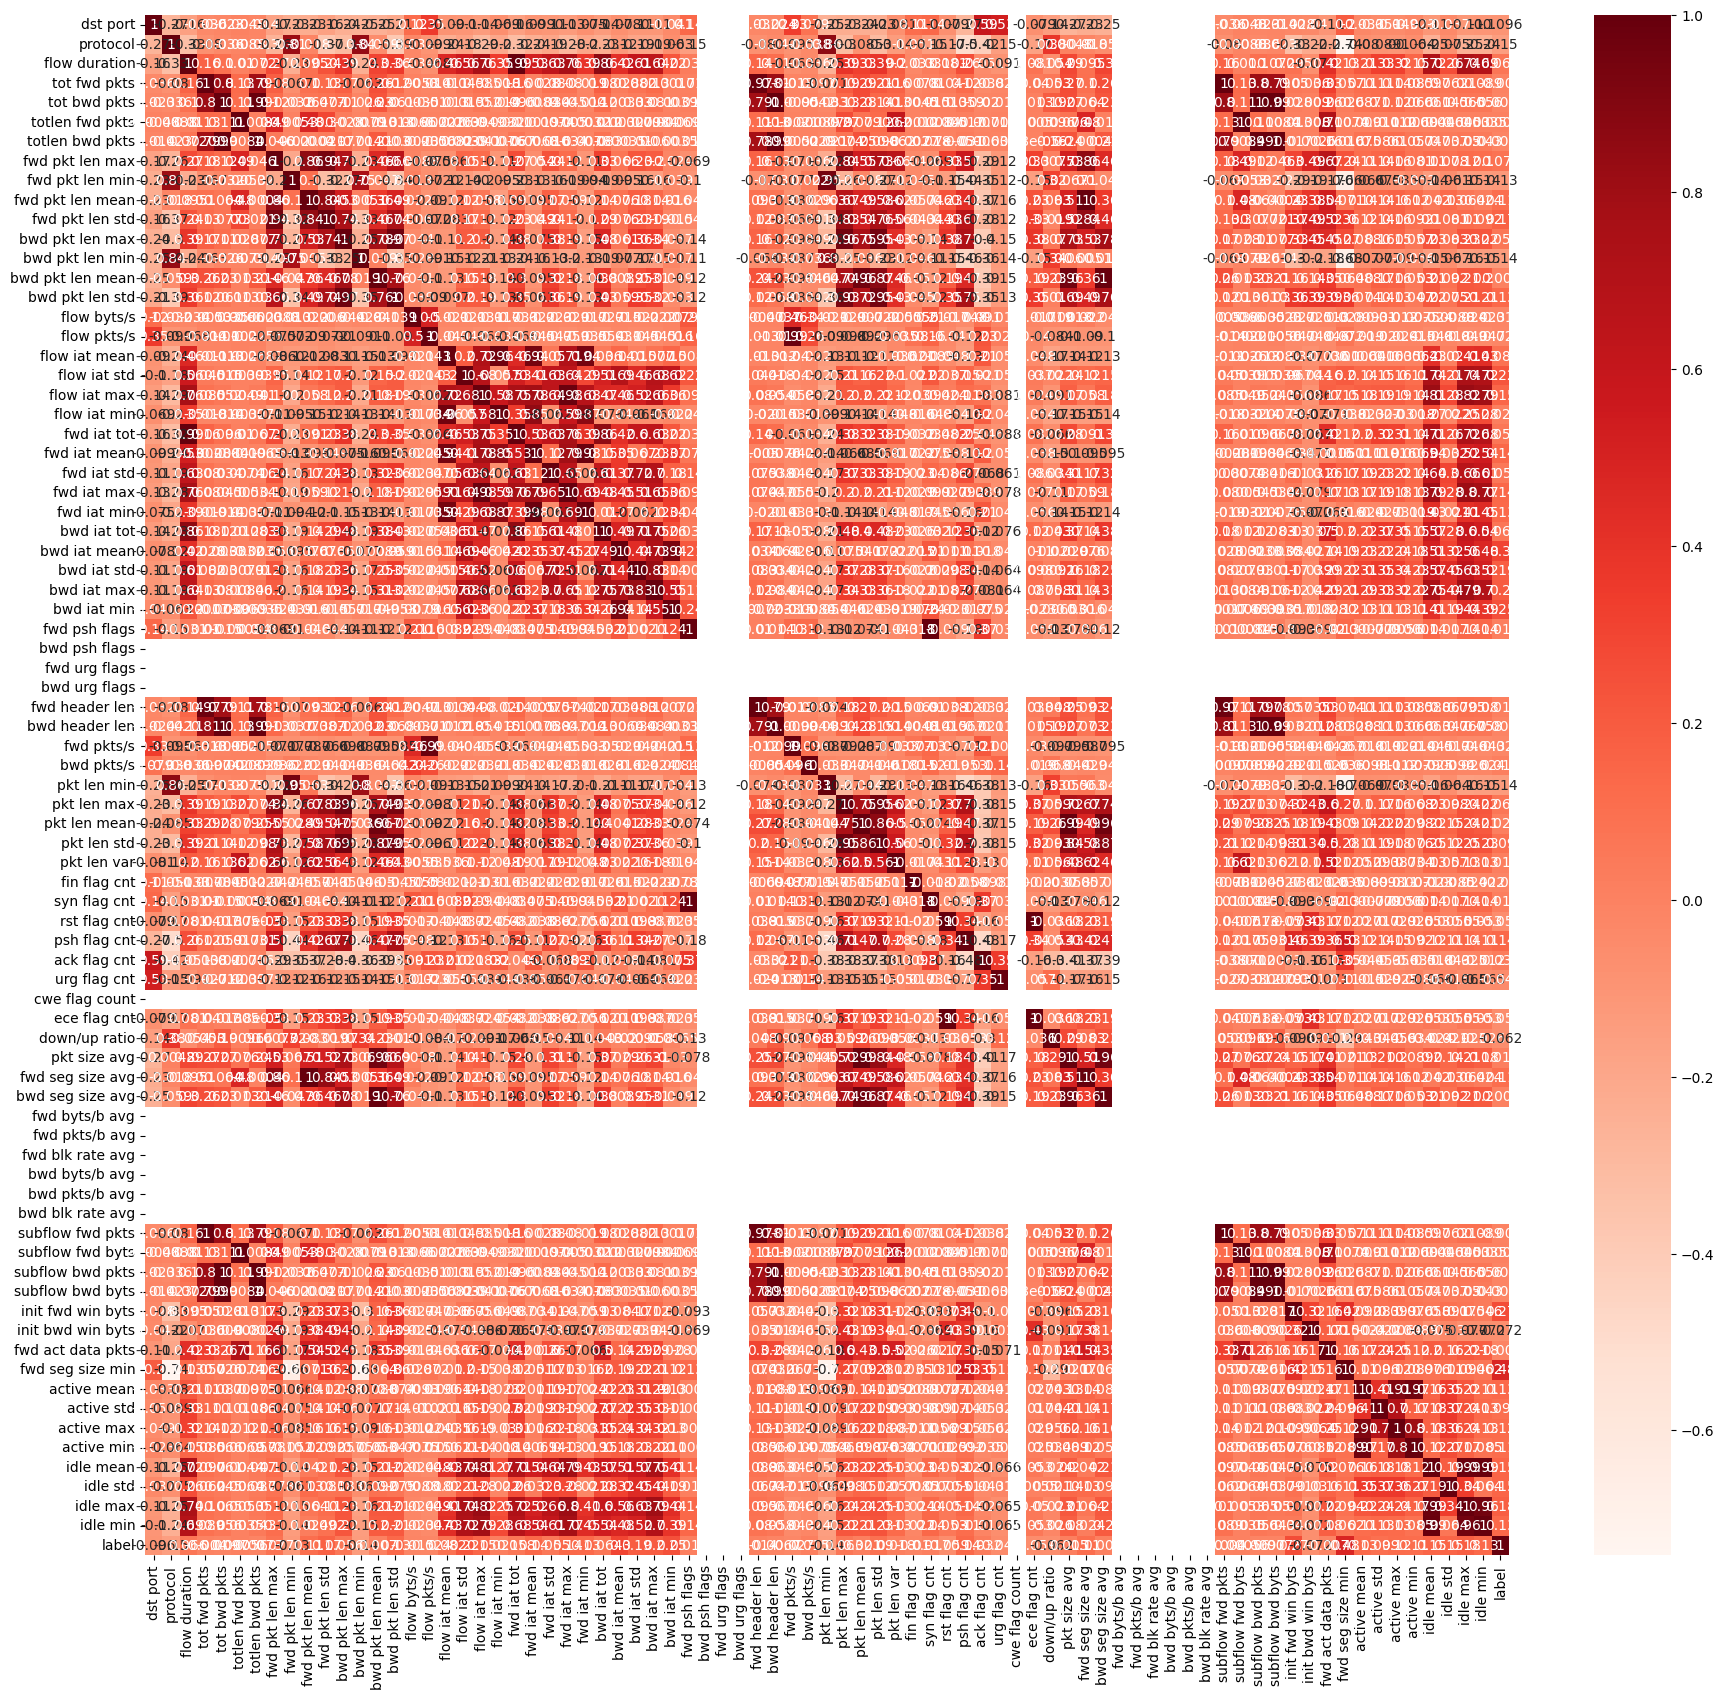

In [ ]:
# Visualize Correlation between Columns
plt.figure(figsize=(22,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Look at the ct_state_ttl, sttl features (too high value) -> can just use these values to get high result (may remove them)

## 2. Feature Engineering

### 2.1 Removing irrelevant features

In [ ]:
drop_cols = [
    'dst port',
    'timestamp',
    'fwd psh flags',
    'bwd psh flags',
    'fwd urg flags',
    'bwd urg flags',
    'flow byts/s',  # This field had np.inf values during training, as such was removed
    'flow pkts/s'  # This field had np.inf values during training, as such was removed
]

df.drop(columns=drop_cols, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3145725 entries, 0 to 1048574
Data columns (total 74 columns):
 #   Column             Dtype  
---  ------             -----  
 0   flow duration      int64  
 1   tot fwd pkts       int64  
 2   tot bwd pkts       int64  
 3   totlen fwd pkts    int64  
 4   totlen bwd pkts    float64
 5   fwd pkt len max    int64  
 6   fwd pkt len min    int64  
 7   fwd pkt len mean   float64
 8   fwd pkt len std    float64
 9   bwd pkt len max    int64  
 10  bwd pkt len min    int64  
 11  bwd pkt len mean   float64
 12  bwd pkt len std    float64
 13  flow iat mean      float64
 14  flow iat std       float64
 15  flow iat max       float64
 16  flow iat min       float64
 17  fwd iat tot        float64
 18  fwd iat mean       float64
 19  fwd iat std        float64
 20  fwd iat max        float64
 21  fwd iat min        float64
 22  bwd iat tot        float64
 23  bwd iat mean       float64
 24  bwd iat std        float64
 25  bwd iat max       

In [ ]:
df.isnull().sum()

flow duration      0
tot fwd pkts       0
tot bwd pkts       0
totlen fwd pkts    0
totlen bwd pkts    0
                  ..
idle min           0
attack_cat         0
protocol_17        0
protocol_6         0
label              0
Length: 74, dtype: int64

In [ ]:
# drop duplicate value
df.drop_duplicates(inplace=True)

### 2.2 Encoding attack category 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Forcing them to be strings
df['attack_cat'] = df['attack_cat'].astype(str)
attack_cat = df['attack_cat']

# Initialize a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the attack category feature and transform the feature
attack_cat_encoded = le.fit_transform(attack_cat)

# Replace the original attack category feature with the encoded feature
df['encoded_attack_cat'] = attack_cat_encoded

print(df['encoded_attack_cat'].unique())


[0 4 5 3 2 1]


### 2.3 Rerun the same heat map for attack categories - TODO

Making sure if there isn't any highly correlated feature

In [ ]:
# Visualize Correlation between Columns
plt.figure(figsize=(22,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### 2.4 Saving the dataset

In [ ]:
df.to_csv("/content/drive/MyDrive/IDS2018/processed_friday_dataset.csv", index=False)